In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns 
import numpy as np

In [2]:
!python -m pip install -U matplotlib

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df = df.iloc[:,2:]

In [4]:
df.sample(5)

,Age,EstimatedSalary,Purchased
241,38,59000,0
76,18,52000,0
296,42,73000,1
46,25,79000,0
26,49,28000,1


# Teain test split

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('Purchased',axis = 1),df['Purchased'],test_size =0.3,random_state=0)

In [6]:
x_train.shape,x_test.shape

((280, 2), (120, 2))

In [10]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scler to the trian set, it will learn the parameters 
scaler.fit (x_train) # here x_train is dataframe 

# transform train and test sets 
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
# here we data in form of array 

In [8]:
# here we givne train a data in form of dataframe 
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [9]:
# but in return in form we get in numpy array 
x_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [12]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [13]:
# here scaled data ko array sha dataframe ma conveted kartha ha 
x_train_scaled  = pd.DataFrame(x_train_scaled,columns = x_train.columns)
x_test_scaled  = pd.DataFrame(x_test_scaled,columns = x_test.columns)

In [14]:
x_train_scaled 

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [15]:
# here we have in the orginal data we get mean = 37.9 and 69807.1
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [16]:
# when we done the StandardScaler in form dataframe 
np.round(x_train_scaled.describe(),1)  # we have the mean is 0 and 0 

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of Scaling 

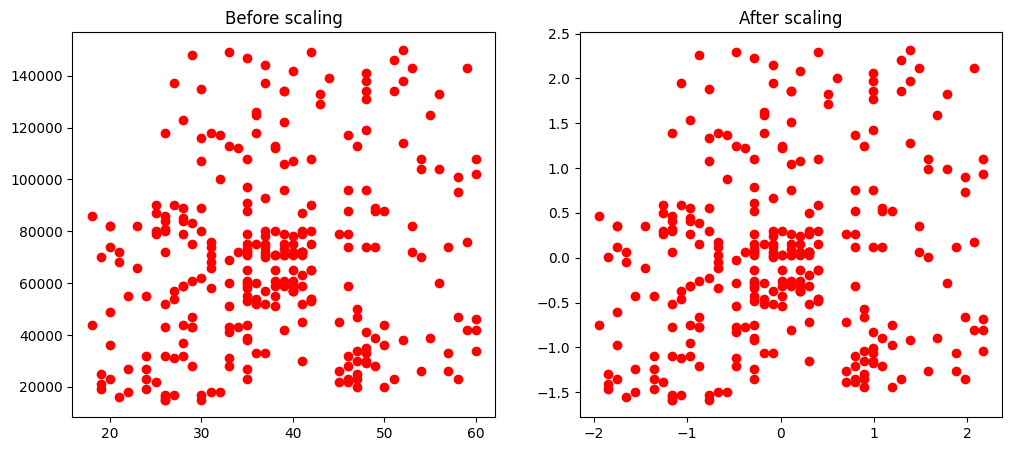

In [17]:
fig,(ax1,ax2) = plt.subplots(ncols=2 ,figsize =(12,5))

ax1.scatter(x_train['Age'],x_train['EstimatedSalary'],color='red')
ax1.set_title('Before scaling')
# here we mean m = 0 and sd = 1
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color = 'red')
ax2.set_title('After scaling')
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

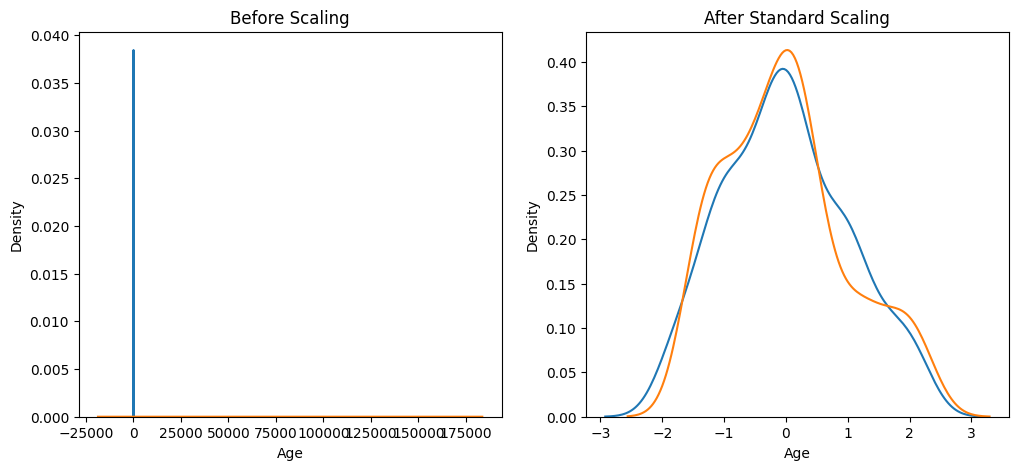

In [18]:
fig,(ax1,ax2) = plt.subplots(ncols = 2, figsize=(12,5))

# before scaling 
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'],ax = ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

# afer scaling 
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'],ax = ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax = ax2)
plt.show()

# Comparison of Distributions

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


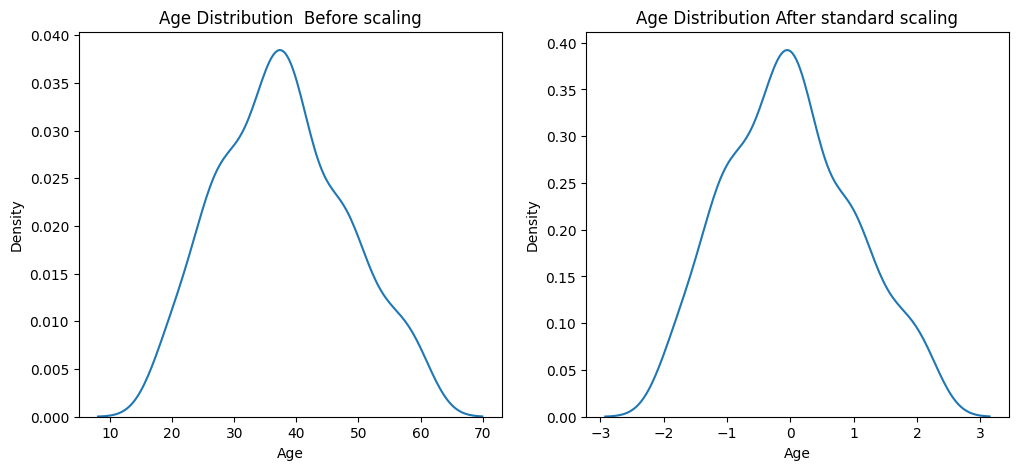

In [24]:
fig,(ax1 ,ax2) = plt.subplots(ncols= 2 , figsize = (12,5))

# before scaling 
ax1.set_title('Age Distribution  Before scaling')
sns.kdeplot(x_train['Age'],ax=ax1)


# after scaling 
ax2.set_title('Age Distribution After standard scaling')
sns.kdeplot(x_train_scaled['Age'],ax = ax2)
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


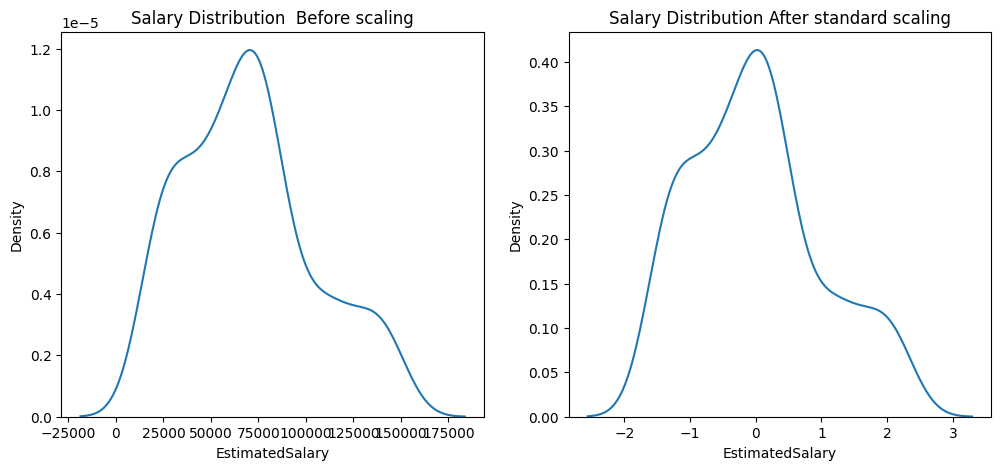

In [25]:
fig,(ax1 ,ax2) = plt.subplots(ncols= 2 , figsize = (12,5))

# before scaling 
ax1.set_title('Salary Distribution  Before scaling')
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)


# after scaling 
ax2.set_title('Salary Distribution After standard scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax = ax2)
plt.show()

# Why scaling in important ?

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr = LogisticRegression()
lr_scaled  = LogisticRegression()

In [29]:
# her we trian the both unscaled and scaled 
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [30]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [31]:
from sklearn.metrics import accuracy_score 

In [32]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


In [34]:
# here in this no accuracy is incresse in the dataframe/
from sklearn.tree import DecisionTreeClassifier 

In [35]:
dt = DecisionTreeClassifier()
df_scaled = DecisionTreeClassifier()

In [37]:
# classifier are train
dt.fit(x_train,y_train)
df_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [39]:
y_pred = dt.predict(x_test)
y_pred_scaled = df_scaled.predict(x_test_scaled)

In [40]:
from sklearn.metrics import accuracy_score 

In [43]:
# here both accuracy is same in this model 
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8666666666666667
Scaled 0.875


In [44]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Effect of Outlier